# Task 1

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# Creation Of Data Frame
df = DataFrame()
df['Course'] = ['P','F','F','F','P','P','F','F'] #shows whether student passed or failed course
df['Exam 1'] = [88,42,31,48,62,75,27,43] #score on first exam
df['Exam 2'] = [90,45,47,45,77,81,40,49] #score on second exam

#Splitting up attributes and categories
dfX = df.drop (columns =['Course'])
sy = df.Course

# Creating testing and training set for the model
from sklearn.model_selection import train_test_split
dfX_train, dfX_test, sy_train, sy_test = train_test_split (dfX, sy)

# Encoding the categorical labels
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
le = le.fit(sy_train)
#Converts into a numpy array of integers
y_train = le.transform(sy_train) # 0 is fail, 1 is pass
#Does the opposite operation on a sample
classes = le.inverse_transform( [1,0,0,0,1,1,0,0])

#Scaling of attributes using MinMaxScaler()
nl = preprocessing.MinMaxScaler() 
nl = nl.fit(dfX_train.to_numpy())
X_train = nl.transform(dfX_train.to_numpy())

#Creating the knn classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)

#Processing of the test datasets
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())

# Task 2

### Task 2a

Text(0, 0.5, 'Score')

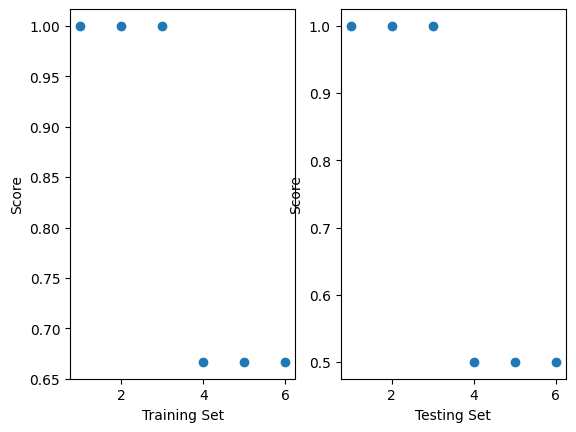

In [2]:
#Creation and population of scores for both test and training sets
k_list = range(1,7)
Train_Score = []
Test_Score = []

for i in k_list: # changes the value of k to compare
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train, y_train)
    Train_Score.append(knn.score(X_train, y_train))
    Test_Score.append(knn.score(X_test, y_test))
    
#Graphing of test and train scores
axs1 = plt.subplot2grid ( shape=(1, 2), loc = (0, 0))
axs2 = plt.subplot2grid ( shape=(1, 2), loc = (0, 1))

axs1.scatter(k_list, Train_Score)
axs1.set_xlabel('Training Set')
axs1.set_ylabel('Score')

axs2.scatter(k_list, Test_Score)
axs2.set_xlabel('Testing Set')
axs2.set_ylabel('Score')

### Task 2b

Text(0, 0.5, 'Score')

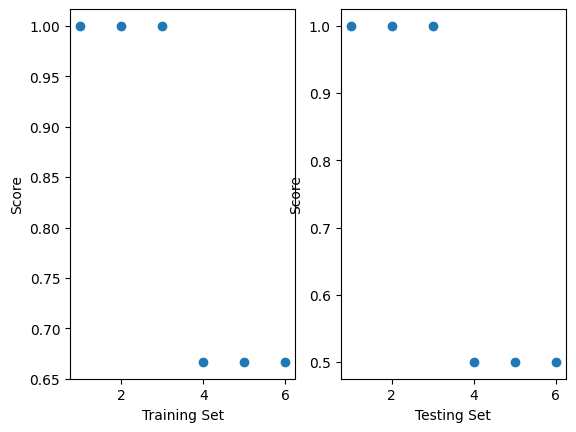

In [3]:
# Altering of Task 1 Variable into StandardScaler()
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(dfX_train.to_numpy())
X_train = scaler.transform(dfX_train.to_numpy())

# Repitition of 2a with the new X_train
Train_Score.clear(), Test_Score.clear()
for i in k_list: # changes the value of k to compare
    knn = KNeighborsClassifier(n_neighbors = i)
    knn = knn.fit(X_train, y_train)
    Train_Score.append(knn.score(X_train, y_train))
    Test_Score.append(knn.score(X_test, y_test))
    
#Graphing of test and train scores
axs1 = plt.subplot2grid ( shape=(1, 2), loc = (0, 0))
axs2 = plt.subplot2grid ( shape=(1, 2), loc = (0, 1))

axs1.scatter(k_list, Train_Score)
axs1.set_xlabel('Training Set')
axs1.set_ylabel('Score')

axs2.scatter(k_list, Test_Score)
axs2.set_xlabel('Testing Set')
axs2.set_ylabel('Score')